# Get Data


In [ ]:
! unzip brain_tumor.zip

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training

# Akuisisi Citra

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import cv2
import os

In [ ]:
labels = ['glioma','meningioma','notumor','pituitary']
img_size = 150
def get_training_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
              img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
              resized_arr = cv2.resize(img_arr, (img_size, img_size))
              data.append([resized_arr, class_num])

    return np.array(data)

In [ ]:
train = get_training_data('Training')

<ipython-input-5-6a098c2596ca>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


(Text(0.5, 1.0, 'Pituitary'), ([], []), ([], []))

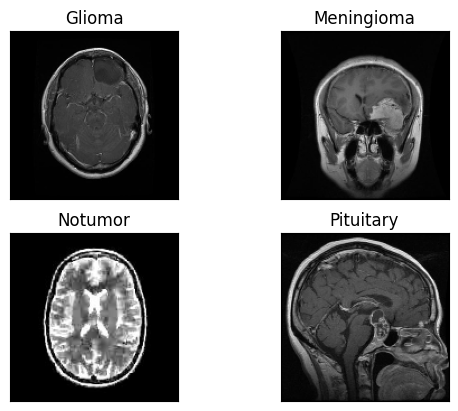

In [ ]:
plt.subplot(2,2,1), plt.imshow(train[np.where(train[:, 1] == 0)[0][0]][0], cmap='gray')
plt.title('Glioma'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2), plt.imshow(train[np.where(train[:, 1] == 1)[0][0]][0], cmap='gray')
plt.title('Meningioma'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3), plt.imshow(train[np.where(train[:, 1] == 2)[0][0]][0], cmap='gray')
plt.title('Notumor'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4), plt.imshow(train[np.where(train[:, 1] == 3)[0][0]][0], cmap='gray')
plt.title('Pituitary'), plt.xticks([]), plt.yticks([])

# Data Preprocessing

## Histogram Equalization

In [ ]:
img_size = 150
def histogram(folder_path):
    os.makedirs('histogram', exist_ok=True)
    data = []
    for root, dirs, files in os.walk(folder_path):
      for file in files:
        if file.lower().endswith(('.jpeg', '.png', '.jpg')):
          if not os.path.exists('histogram/' + root.split('/')[1]):
            os.makedirs('histogram/' + root.split('/')[1])
          image = cv2.imread(os.path.join(folder_path, file), 0)
          equalized_img = cv2.equalizeHist(image)
          resized_arr = cv2.resize(equalized_img, (img_size, img_size))
          cv2.imwrite('histogram/' + root.split('/')[1] + '/' + file, resized_arr)
          data.append([resized_arr])
    return np.array(data)

In [ ]:
glioma = histogram('Training/glioma')
meningioma = histogram('Training/meningioma')
notumor = histogram('Training/notumor')
pituitary = histogram('Training/pituitary')

(Text(0.5, 1.0, 'Pituitary'), ([], []), ([], []))

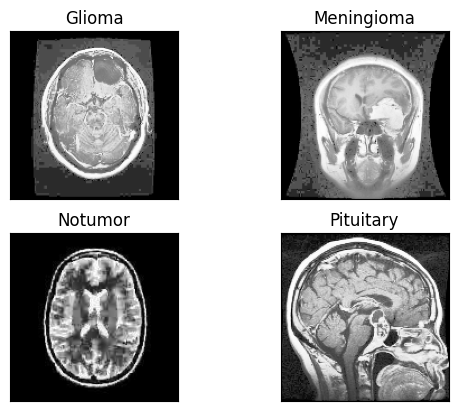

In [ ]:
plt.subplot(2,2,1), plt.imshow(glioma[0][0], cmap='gray')
plt.title('Glioma'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2), plt.imshow(meningioma[0][0], cmap='gray')
plt.title('Meningioma'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3), plt.imshow(notumor[0][0], cmap='gray')
plt.title('Notumor'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4), plt.imshow(pituitary[0][0], cmap='gray')
plt.title('Pituitary'), plt.xticks([]), plt.yticks([])

## Stretching

In [ ]:
img_size = 150
def stretching(folder_path):
    os.makedirs('stretching', exist_ok=True)
    data = []
    for root, dirs, files in os.walk(folder_path):
      for file in files:
        if file.lower().endswith(('.jpeg', '.png', '.jpg')):
          if not os.path.exists('stretching/' + root.split('/')[1]):
            os.makedirs('stretching/' + root.split('/')[1])
          image = cv2.imread(os.path.join(folder_path, file), 0)
          stretch_img = cv2.convertScaleAbs(image, alpha=1.5, beta=2.0)
          resized_arr = cv2.resize(stretch_img, (img_size, img_size))
          cv2.imwrite('stretching/' + root.split('/')[1] + '/' + file, resized_arr)
          data.append([resized_arr])
    return np.array(data)

In [ ]:
glioma = stretching('histogram/glioma')
meningioma = stretching('histogram/meningioma')
notumor = stretching('histogram/notumor')
pituitary = stretching('histogram/pituitary')

(Text(0.5, 1.0, 'Pituitary'), ([], []), ([], []))

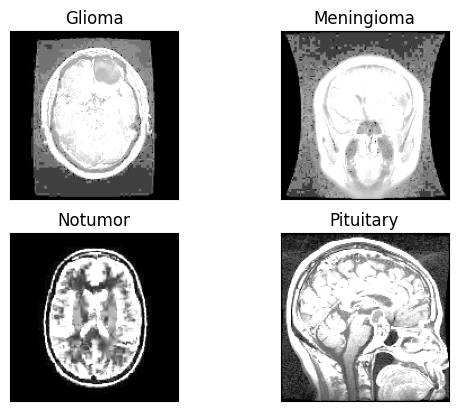

In [ ]:
plt.subplot(2,2,1), plt.imshow(glioma[0][0], cmap='gray')
plt.title('Glioma'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2), plt.imshow(meningioma[0][0], cmap='gray')
plt.title('Meningioma'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3), plt.imshow(notumor[0][0], cmap='gray')
plt.title('Notumor'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4), plt.imshow(pituitary[0][0], cmap='gray')
plt.title('Pituitary'), plt.xticks([]), plt.yticks([])

## Filtering

In [ ]:
img_size = 150
def filtering(folder_path):
    os.makedirs('filtering', exist_ok=True)
    data = []
    for root, dirs, files in os.walk(folder_path):
      for file in files:
        if file.lower().endswith(('.jpeg', '.png', '.jpg')):
          if not os.path.exists('filtering/' + root.split('/')[1]):
            os.makedirs('filtering/' + root.split('/')[1])
          image = cv2.imread(os.path.join(folder_path, file), 0)
          filter_img = cv2.medianBlur(image, 3)
          resized_arr = cv2.resize(filter_img, (img_size, img_size))
          cv2.imwrite('filtering/' + root.split('/')[1] + '/' + file, resized_arr)
          data.append([resized_arr])
    return np.array(data)

In [ ]:
glioma = filtering('stretching/glioma')
meningioma = filtering('stretching/meningioma')
notumor = filtering('stretching/notumor')
pituitary = filtering('stretching/pituitary')

(Text(0.5, 1.0, 'Pituitary'), ([], []), ([], []))

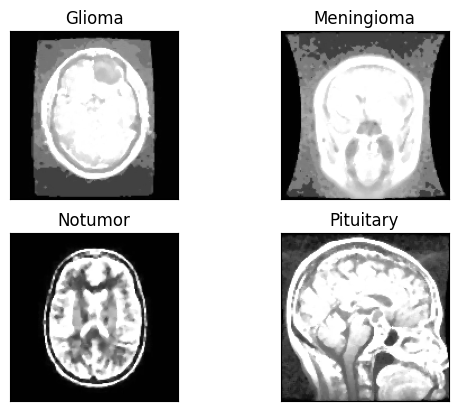

In [ ]:
plt.subplot(2,2,1), plt.imshow(glioma[0][0], cmap='gray')
plt.title('Glioma'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2), plt.imshow(meningioma[0][0], cmap='gray')
plt.title('Meningioma'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3), plt.imshow(notumor[0][0], cmap='gray')
plt.title('Notumor'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4), plt.imshow(pituitary[0][0], cmap='gray')
plt.title('Pituitary'), plt.xticks([]), plt.yticks([])

## Thresholding (Hanya Gambaran)

In [ ]:
img_size = 150
def thresholding(folder_path):
    os.makedirs('thresholding', exist_ok=True)
    data = []
    for root, dirs, files in os.walk(folder_path):
      for file in files:
        if file.lower().endswith(('.jpeg', '.png', '.jpg')):
          if not os.path.exists('thresholding/' + root.split('/')[1]):
            os.makedirs('thresholding/' + root.split('/')[1])
          image = cv2.imread(os.path.join(folder_path, file), 0)
          _, thresholded = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
          resized_arr = cv2.resize(thresholded, (img_size, img_size))
          cv2.imwrite('thresholding/' + root.split('/')[1] + '/' + file, resized_arr)
          data.append([resized_arr])
    return np.array(data)

In [ ]:
glioma = thresholding('filtering/glioma')
meningioma = thresholding('filtering/meningioma')
notumor = thresholding('filtering/notumor')
pituitary = thresholding('filtering/pituitary')

(Text(0.5, 1.0, 'Pituitary'), ([], []), ([], []))

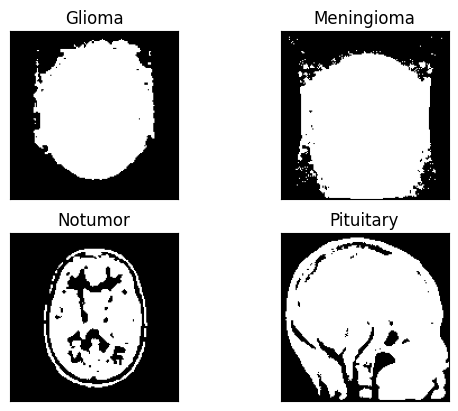

In [ ]:
plt.subplot(2,2,1), plt.imshow(glioma[0][0], cmap='gray')
plt.title('Glioma'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2), plt.imshow(meningioma[0][0], cmap='gray')
plt.title('Meningioma'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3), plt.imshow(notumor[0][0], cmap='gray')
plt.title('Notumor'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4), plt.imshow(pituitary[0][0], cmap='gray')
plt.title('Pituitary'), plt.xticks([]), plt.yticks([])

## Segmentasi Sobel (Hanya Gambaran)

In [ ]:
img_size = 150
def sobelDetection(folder_path):
    os.makedirs('sobelDetection', exist_ok=True)
    data = []
    for root, dirs, files in os.walk(folder_path):
      for file in files:
        if file.lower().endswith(('.jpeg', '.png', '.jpg')):
          if not os.path.exists('sobelDetection/' + root.split('/')[1]):
            os.makedirs('sobelDetection/' + root.split('/')[1])
          image = cv2.imread(os.path.join(folder_path, file), 0)
          sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)  # Operator Sobel-x
          sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)  # Operator Sobel-y
          sobel = cv2.bitwise_or(cv2.convertScaleAbs(sobelx), cv2.convertScaleAbs(sobely))
          resized_arr = cv2.resize(sobel, (img_size, img_size))
          cv2.imwrite('sobelDetection/' + root.split('/')[1] + '/' + file, resized_arr)
          data.append([resized_arr])
    return np.array(data)

In [ ]:
glioma = sobelDetection('thresholding/glioma')
meningioma = sobelDetection('thresholding/meningioma')
notumor = sobelDetection('thresholding/notumor')
pituitary = sobelDetection('thresholding/pituitary')

(Text(0.5, 1.0, 'Pituitary'), ([], []), ([], []))

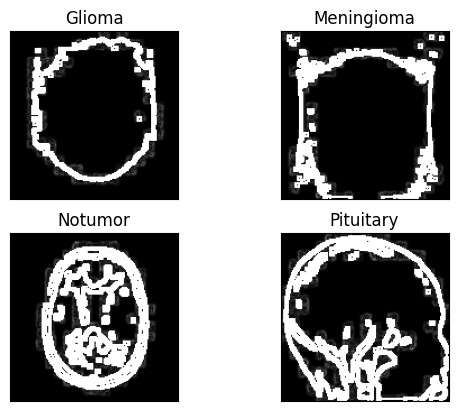

In [ ]:
plt.subplot(2,2,1), plt.imshow(glioma[0][0], cmap='gray')
plt.title('Glioma'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2), plt.imshow(meningioma[0][0], cmap='gray')
plt.title('Meningioma'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3), plt.imshow(notumor[0][0], cmap='gray')
plt.title('Notumor'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4), plt.imshow(pituitary[0][0], cmap='gray')
plt.title('Pituitary'), plt.xticks([]), plt.yticks([])

## Segmentasi Canny (Hanya Gambaran)

In [ ]:
img_size = 150
def cannyDetection(folder_path):
    os.makedirs('cannyDetection', exist_ok=True)
    data = []
    for root, dirs, files in os.walk(folder_path):
      for file in files:
        if file.lower().endswith(('.jpeg', '.png', '.jpg')):
          if not os.path.exists('cannyDetection/' + root.split('/')[1]):
            os.makedirs('cannyDetection/' + root.split('/')[1])
          image = cv2.imread(os.path.join(folder_path, file), 0)
          canny = cv2.Canny(image, 100, 200)
          resized_arr = cv2.resize(canny, (img_size, img_size))
          cv2.imwrite('cannyDetection/' + root.split('/')[1] + '/' + file, resized_arr)
          data.append([resized_arr])
    return np.array(data)

In [ ]:
glioma = cannyDetection('thresholding/glioma')
meningioma = cannyDetection('thresholding/meningioma')
notumor = cannyDetection('thresholding/notumor')
pituitary = cannyDetection('thresholding/pituitary')

(Text(0.5, 1.0, 'Pituitary'), ([], []), ([], []))

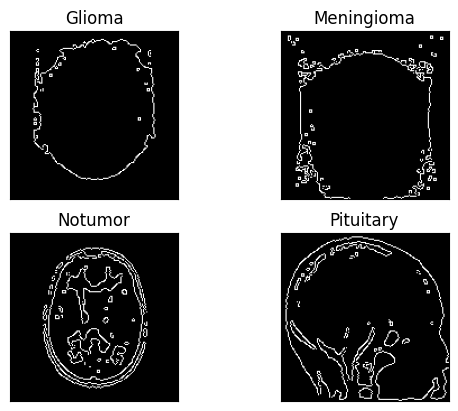

In [ ]:
plt.subplot(2,2,1), plt.imshow(glioma[0][0], cmap='gray')
plt.title('Glioma'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2), plt.imshow(meningioma[0][0], cmap='gray')
plt.title('Meningioma'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3), plt.imshow(notumor[0][0], cmap='gray')
plt.title('Notumor'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4), plt.imshow(pituitary[0][0], cmap='gray')
plt.title('Pituitary'), plt.xticks([]), plt.yticks([])

# Ekstraksi Fitur dari Segmentasi Sobel dan Canny

In [ ]:
def extractFeatures(image):
    canny = cv2.Canny(image, 100, 200)
    _, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    sobel = cv2.add(np.abs(sobelx), np.abs(sobely))
    _, sobel_thresholded = cv2.threshold(sobel, 128, 255, cv2.THRESH_BINARY)

    canny_count = np.count_nonzero(canny)
    threshold_count = np.count_nonzero(thresh)
    sobel_count = np.sum(sobel_thresholded == 255)
    total_pixel_x = np.sum(sobelx == 255)
    total_pixel_y = np.sum(sobely == 255)
    total = (threshold_count / sobel_count) * 100

    return np.array([canny_count, threshold_count, sobel_count, total_pixel_x, total_pixel_y, total])

In [ ]:
features = []
labels = []

def feature(folder_path):
    os.makedirs('feature', exist_ok=True)
    data = []
    for root, dirs, files in os.walk(folder_path):
      for file in files:
        if file.lower().endswith(('.jpeg', '.png', '.jpg')):
          if not os.path.exists('feature/' + root.split('/')[1]):
            os.makedirs('feature/' + root.split('/')[1])
          image = cv2.imread(os.path.join(folder_path, file), 0)
          feature_vector = extractFeatures(image)
          features.append(feature_vector)
          labels.append(file.split('_')[0])
          cv2.imwrite('feature/' + root.split('/')[1] + '/' + file, feature_vector)
          data.append([feature_vector])
    return np.array(data)

In [ ]:
glioma = feature('filtering/glioma')
meningioma = feature('filtering/meningioma')
notumor = feature('filtering/notumor')
pituitary = feature('filtering/pituitary')

In [ ]:
features = np.array(features)
labels = np.array(labels)

In [ ]:
df = pd.DataFrame(features, columns=['canny_count', 'threshold_count', 'sobel_count', 'total_pixel_x', 'total_pixel_y', 'total'])
df['Labels'] = labels
df['Labels'].replace({"Tr-gl":"Glioma","Tr-glTr":"Glioma",
                      "Tr-me":"Meningioma","Tr-meTr":"Meningioma",
                      "Tr-no":"Notumor","Tr-noTr":"Notumor",
                      "Tr-pi":"Pituitary","Tr-piTr":"Pituitary"}, inplace=True)
df

,canny_count,threshold_count,sobel_count,total_pixel_x,total_pixel_y,total,Labels
0,2020.0,10571.0,11075.0,5.0,4.0,95.449210,Glioma
1,2671.0,12114.0,14941.0,5.0,7.0,81.078910,Glioma
2,2038.0,13457.0,10558.0,2.0,2.0,127.457852,Glioma
3,2383.0,11816.0,14516.0,6.0,9.0,81.399835,Glioma
4,3090.0,14840.0,16203.0,5.0,12.0,91.587978,Glioma
...,...,...,...,...,...,...,...
5707,3485.0,13929.0,17672.0,7.0,4.0,78.819602,Pituitary
5708,4019.0,15591.0,19711.0,9.0,5.0,79.097966,Pituitary
5709,3760.0,14119.0,18337.0,5.0,7.0,76.997328,Pituitary
5710,4173.0,15499.0,19689.0,8.0,8.0,78.719082,Pituitary


In [ ]:
from google.colab import data_table
data_table.DataTable(df, include_index=False, num_rows_per_page=10)

,canny_count,threshold_count,sobel_count,total_pixel_x,total_pixel_y,total,Labels
0,2020.0,10571.0,11075.0,5.0,4.0,95.449210,Glioma
1,2671.0,12114.0,14941.0,5.0,7.0,81.078910,Glioma
2,2038.0,13457.0,10558.0,2.0,2.0,127.457852,Glioma
3,2383.0,11816.0,14516.0,6.0,9.0,81.399835,Glioma
4,3090.0,14840.0,16203.0,5.0,12.0,91.587978,Glioma
...,...,...,...,...,...,...,...
5707,3485.0,13929.0,17672.0,7.0,4.0,78.819602,Pituitary
5708,4019.0,15591.0,19711.0,9.0,5.0,79.097966,Pituitary
5709,3760.0,14119.0,18337.0,5.0,7.0,76.997328,Pituitary
5710,4173.0,15499.0,19689.0,8.0,8.0,78.719082,Pituitary


# Klasifikasi Citra

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 5
model = KNeighborsClassifier(n_neighbors=k)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Akurasi model KNN: {:.2f}%'.format(accuracy * 100))

Akurasi model KNN: 75.85%


## Model Klasifikasi

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.imagenet_utils import decode_predictions
from sklearn.neighbors import KNeighborsClassifier

img = cv2.imread('/content/Testing/notumor/Te-noTr_0003.jpg', 0)
equalized_img = cv2.equalizeHist(img)
stretch_img = cv2.convertScaleAbs(equalized_img, alpha=1.5, beta=2.0)
filter_img = cv2.medianBlur(stretch_img, 3)

def extractFeatures(image):
    canny = cv2.Canny(image, 100, 200)
    _, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    sobel = cv2.add(np.abs(sobelx), np.abs(sobely))
    _, sobel_thresholded = cv2.threshold(sobel, 128, 255, cv2.THRESH_BINARY)

    canny_count = np.count_nonzero(canny)
    threshold_count = np.count_nonzero(thresh)
    sobel_count = np.sum(sobel_thresholded == 255)
    total_pixel_x = np.sum(sobelx == 255)
    total_pixel_y = np.sum(sobely == 255)
    total = (threshold_count / sobel_count) * 100

    return np.array([canny_count, threshold_count, sobel_count, total_pixel_x, total_pixel_y, total])

feature_vector = extractFeatures(stretch_img)

print(feature_vector)

predicted_label = model.predict(feature_vector.reshape(1, -1))

predicted_class = predicted_label

print('Prediksi label citra: {}'.format(predicted_class[0]))

[7.86200000e+03 4.35560000e+04 3.23560000e+04 7.00000000e+00
 5.00000000e+00 1.34614909e+02]
Prediksi label citra: Notumor


# Evaluasi

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("KNN Accuracy: ", accuracy_score(y_test, y_pred))
print("KNN Precision: ", precision_score(y_test, y_pred, average = "macro"))
print("KNN Recall: ", recall_score(y_test, y_pred, average = "macro"))
print("KNN F1 Score: ", f1_score(y_test, y_pred, average = "macro"))

print(f'confusion matrix:\n {confusion_matrix(y_test, y_pred)}')
print("----------------------------------------------------------")
print(classification_report(y_test, y_pred, zero_division = 0))

KNN Accuracy:  0.7585301837270341
KNN Precision:  0.7513056223095668
KNN Recall:  0.7534811625519692
KNN F1 Score:  0.7519594742519743
confusion matrix:
 [[214  51  13  10]
 [ 60 152  32  21]
 [  7  26 236  22]
 [  8  16  10 265]]
----------------------------------------------------------
              precision    recall  f1-score   support

      Glioma       0.74      0.74      0.74       288
  Meningioma       0.62      0.57      0.60       265
     Notumor       0.81      0.81      0.81       291
   Pituitary       0.83      0.89      0.86       299

    accuracy                           0.76      1143
   macro avg       0.75      0.75      0.75      1143
weighted avg       0.75      0.76      0.76      1143

